In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
import graphviz
from sklearn.neighbors import KNeighborsClassifier

In [152]:
data2 = pd.read_csv("fraud_0.1origbase.csv")

In [153]:
data = pd.read_csv("play_tennis.csv")

In [154]:
data

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
6,D7,Overcast,Cool,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes


In [155]:
data['play'].value_counts()

play
Yes    9
No     5
Name: count, dtype: int64

In [156]:
label_encoder  = LabelEncoder()

In [157]:
data.select_dtypes(include=['object']).columns.tolist()

['day', 'outlook', 'temp', 'humidity', 'wind', 'play']

In [158]:
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()

In [159]:
categorical_cols

['day', 'outlook', 'temp', 'humidity', 'wind', 'play']

In [160]:
encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = encoder.fit_transform(data[col])



In [161]:
data[col]

0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: play, dtype: int64

In [162]:
data

,day,outlook,temp,humidity,wind,play
0,0,2,1,0,1,0
1,6,2,1,0,0,0
2,7,0,1,0,1,1
3,8,1,2,0,1,1
4,9,1,0,1,1,1
5,10,1,0,1,0,0
6,11,0,0,1,0,1
7,12,2,2,0,1,0
8,13,2,0,1,1,1
9,1,1,2,1,1,1


In [163]:
x = data.drop(['play','day'],axis=1)
y = data['play']



In [164]:
y

0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: play, dtype: int64

In [165]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=2,stratify=y,random_state=2)

In [166]:
x_train

,outlook,temp,humidity,wind
13,1,2,0,0
5,1,0,1,0
9,1,2,1,1
12,0,1,1,1
1,2,1,0,0
2,0,1,0,1
7,2,2,0,1
4,1,0,1,1
11,0,2,0,0
8,2,0,1,1


In [167]:
model = DecisionTreeClassifier()

In [168]:
model

DecisionTreeClassifier()

In [169]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [170]:
model.feature_importances_

array([0.4375, 0.    , 0.1125, 0.45  ])

In [171]:
feature_names = x.columns.tolist()

In [172]:
!pip install graphviz

In [173]:
feature_names

['outlook', 'temp', 'humidity', 'wind']

In [174]:
class_names = data['play'].unique().tolist()

In [175]:
class_names

[0, 1]

[Text(0.3333333333333333, 0.9, 'x[0] <= 0.5\ngini = 0.444\nsamples = 12\nvalue = [4, 8]'),
 Text(0.16666666666666666, 0.7, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.5, 0.7, 'x[3] <= 0.5\ngini = 0.5\nsamples = 8\nvalue = [4, 4]'),
 Text(0.3333333333333333, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.6666666666666666, 0.5, 'x[2] <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.5, 0.3, 'x[0] <= 1.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.3333333333333333, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6666666666666666, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8333333333333334, 0.3, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]')]

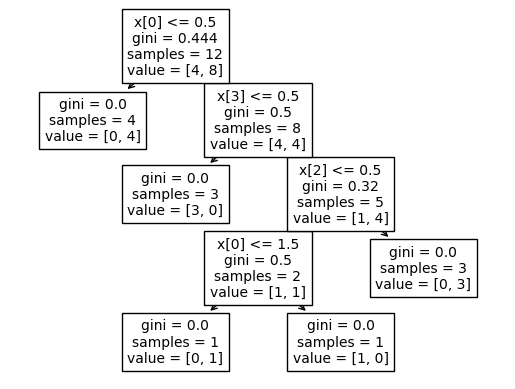

In [176]:
tree.plot_tree(model)

In [177]:
dot_data = tree.export_graphviz(model,out_file = None , feature_names=feature_names , filled  = True , rounded=True , special_characters = True)

In [178]:
graph = graphviz.Source(dot_data)

In [179]:
graph

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [180]:
data2

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,283,CASH_IN,210329.84,C1159819632,3778062.79,3988392.64,C1218876138,1519266.60,1308936.76,0
1,132,CASH_OUT,215489.19,C1372369468,21518.00,0.00,C467105520,6345756.55,6794954.89,0
2,355,DEBIT,4431.05,C1059822709,20674.00,16242.95,C76588246,80876.56,85307.61,0
3,135,CASH_OUT,214026.20,C1464960643,46909.73,0.00,C1059379810,13467450.36,13681476.56,0
4,381,CASH_OUT,8858.45,C831134427,0.00,0.00,C579876929,1667180.58,1676039.03,0
...,...,...,...,...,...,...,...,...,...,...
636257,351,CASH_OUT,28761.10,C742050657,0.00,0.00,C568407561,328534.52,357295.62,0
636258,184,CASH_OUT,167820.71,C561181412,62265.00,0.00,C1852953580,106429.48,274250.18,0
636259,35,PAYMENT,8898.12,C1773417333,30808.00,21909.88,M445701551,0.00,0.00,0
636260,277,CASH_OUT,176147.90,C1423233247,83669.00,0.00,C1328739120,0.00,176147.90,0


In [181]:
data2.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,283,CASH_IN,210329.84,C1159819632,3778062.79,3988392.64,C1218876138,1519266.60,1308936.76,0
1,132,CASH_OUT,215489.19,C1372369468,21518.00,0.00,C467105520,6345756.55,6794954.89,0
2,355,DEBIT,4431.05,C1059822709,20674.00,16242.95,C76588246,80876.56,85307.61,0
3,135,CASH_OUT,214026.20,C1464960643,46909.73,0.00,C1059379810,13467450.36,13681476.56,0
4,381,CASH_OUT,8858.45,C831134427,0.00,0.00,C579876929,1667180.58,1676039.03,0


In [182]:
data2.isFraud.value_counts()

isFraud
0    635441
1       821
Name: count, dtype: int64

In [183]:
data2.drop(['step','nameOrig','nameDest'],inplace=True,axis=1)

In [184]:
data2

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,CASH_IN,210329.84,3778062.79,3988392.64,1519266.60,1308936.76,0
1,CASH_OUT,215489.19,21518.00,0.00,6345756.55,6794954.89,0
2,DEBIT,4431.05,20674.00,16242.95,80876.56,85307.61,0
3,CASH_OUT,214026.20,46909.73,0.00,13467450.36,13681476.56,0
4,CASH_OUT,8858.45,0.00,0.00,1667180.58,1676039.03,0
...,...,...,...,...,...,...,...
636257,CASH_OUT,28761.10,0.00,0.00,328534.52,357295.62,0
636258,CASH_OUT,167820.71,62265.00,0.00,106429.48,274250.18,0
636259,PAYMENT,8898.12,30808.00,21909.88,0.00,0.00,0
636260,CASH_OUT,176147.90,83669.00,0.00,0.00,176147.90,0


In [185]:
label_enc = LabelEncoder()

In [186]:
data2['type'] = label_enc.fit_transform(data['type'])

KeyError: 'type'

In [ ]:
data2

In [ ]:
x = data2.drop(['isFraud'],axis=1)
y  = data2['isFraud']

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state=32)

In [ ]:
from sklearn.neighbors import kNeighborsClassifier

In [ ]:
knn_class = kNeighborsClassifier()

In [ ]:
knn_class = kNeighborsClassifier(n_neighbors=3)

In [ ]:
knn-class.fit(x_train , y_train)

In [ ]:
y_pred =  knn_class.predict(x_test)

In [ ]:
y_pred

In [ ]:
from sklearn.metrics import accuracy_score, classification_report , confusion_matrix

In [ ]:
accuracy = accuracy_score(y_pred,y_test.values)

In [ ]:
class_report = classification_report(y_pred , y_test.values)
print(class_report)

In [ ]:
conf_matrix = confusion_matrix(y_pred , y_test.values)
confi_matrix

In [ ]:
data_non_fraud = data2[data2['isFraud'] == 0][:1000]
data_fraud = data2[data2['isFraud']==1]
data_non_fraud

In [ ]:
data2 = pd.concat([data_non_fraud,data_fraud])

In [ ]:
data2

In [ ]:
conf_mat  = confusion_matrix(y_pred,y_test.values)